In [241]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

In [242]:
# helper to make command to get files

c = 'scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"'

for i in range(0, 79):
    c_new = '~/bias/xai_priming/0_' + str(i) + '.csv '
    c += c_new

c = c[:-1]
c += '" /Users/laura/Programming/Projects/xai_priming/data_analysis'

print(c)

scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"~/bias/xai_priming/0_0.csv ~/bias/xai_priming/0_1.csv ~/bias/xai_priming/0_2.csv ~/bias/xai_priming/0_3.csv ~/bias/xai_priming/0_4.csv ~/bias/xai_priming/0_5.csv ~/bias/xai_priming/0_6.csv ~/bias/xai_priming/0_7.csv ~/bias/xai_priming/0_8.csv ~/bias/xai_priming/0_9.csv ~/bias/xai_priming/0_10.csv ~/bias/xai_priming/0_11.csv ~/bias/xai_priming/0_12.csv ~/bias/xai_priming/0_13.csv ~/bias/xai_priming/0_14.csv ~/bias/xai_priming/0_15.csv ~/bias/xai_priming/0_16.csv ~/bias/xai_priming/0_17.csv ~/bias/xai_priming/0_18.csv ~/bias/xai_priming/0_19.csv ~/bias/xai_priming/0_20.csv ~/bias/xai_priming/0_21.csv ~/bias/xai_priming/0_22.csv ~/bias/xai_priming/0_23.csv ~/bias/xai_priming/0_24.csv ~/bias/xai_priming/0_25.csv ~/bias/xai_priming/0_26.csv ~/bias/xai_priming/0_27.csv ~/bias/xai_priming/0_28.csv ~/bias/xai_priming/0_29.csv ~/bias/xai_priming/0_30.csv ~/bias/xai_priming/0_31.csv ~/bias/xai_priming/0_32.csv ~/bias/xai_priming/0_33.csv ~/bias/xai_

In [243]:
# helper to make command to get files

c = 'scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"'

for i in range(0, 80):
    c_new = '~/bias/xai_priming/1_' + str(i) + '.csv '
    c += c_new

c = c[:-1]
c += '" /Users/laura/Programming/Projects/xai_priming/data_analysis'

print(c)

scp -T -i id_rsa_abba agdmt@hai.uni-bremen.de:"~/bias/xai_priming/1_0.csv ~/bias/xai_priming/1_1.csv ~/bias/xai_priming/1_2.csv ~/bias/xai_priming/1_3.csv ~/bias/xai_priming/1_4.csv ~/bias/xai_priming/1_5.csv ~/bias/xai_priming/1_6.csv ~/bias/xai_priming/1_7.csv ~/bias/xai_priming/1_8.csv ~/bias/xai_priming/1_9.csv ~/bias/xai_priming/1_10.csv ~/bias/xai_priming/1_11.csv ~/bias/xai_priming/1_12.csv ~/bias/xai_priming/1_13.csv ~/bias/xai_priming/1_14.csv ~/bias/xai_priming/1_15.csv ~/bias/xai_priming/1_16.csv ~/bias/xai_priming/1_17.csv ~/bias/xai_priming/1_18.csv ~/bias/xai_priming/1_19.csv ~/bias/xai_priming/1_20.csv ~/bias/xai_priming/1_21.csv ~/bias/xai_priming/1_22.csv ~/bias/xai_priming/1_23.csv ~/bias/xai_priming/1_24.csv ~/bias/xai_priming/1_25.csv ~/bias/xai_priming/1_26.csv ~/bias/xai_priming/1_27.csv ~/bias/xai_priming/1_28.csv ~/bias/xai_priming/1_29.csv ~/bias/xai_priming/1_30.csv ~/bias/xai_priming/1_31.csv ~/bias/xai_priming/1_32.csv ~/bias/xai_priming/1_33.csv ~/bias/xai_

# Read and format data

## Sample DF

Get sample df to check correct decision and AI decision for each task.

In [412]:
df = pd.read_csv("sample_string.csv", index_col = "Index")
df

,Marital status,Application mode,University's position in preferences when applying,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem enrolled,Total exams across all classes in 2nd sem,Curricular units 2nd sem passed,Curricular units 2nd sem grade,Curricular units 2nd sem without exams,Unemployment rate at enrollment,Inflation rate at enrollment,GDP at enrollment,Target,AI prediction
Index,,,,,,,,,,,,,,,,,,,,,
648,Single,Change in course,2,Oral Hygiene,daytime,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Administrative staff,...,8,10,8,13.212500,0,10.8,1.4,1.74,Graduate,Graduate
2781,Single,1st phase—general contingent,1,Basic Education,daytime,Secondary education,Portuguese,2nd cycle of the general high school course,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,14,1,11.000000,0,10.8,1.4,1.74,Dropout,Dropout
2883,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,8,6,11.500000,0,8.9,1.4,3.51,Graduate,Graduate
266,Single,2nd phase—general contingent,4,Nursing,daytime,Secondary education,Portuguese,Higher Education—master’s degree,Secondary Education—12th Year of Schooling or ...,Specialists in Intellectual and Scientific Act...,...,8,8,7,14.828571,0,12.7,3.7,-1.70,Graduate,Graduate
2537,Single,1st phase—general contingent,1,Advertising and Marketing Management,daytime,Secondary education,Portuguese,General commerce course,Basic Education 3rd Cycle (9th/10th/11th Year)...,"Skilled Workers in Industry, Construction, and...",...,6,6,6,15.833333,0,12.4,0.5,1.79,Graduate,Graduate
2791,Single,1st phase—general contingent,1,Veterinary Nursing,daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,...,6,8,6,14.142857,0,11.1,0.6,2.02,Graduate,Graduate
1576,Married,Over 23 years old,2,Advertising and Marketing Management,daytime,Basic education 3rd cycle (9th/10th/11th year)...,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,9,4,13.750000,0,12.4,0.5,1.79,Dropout,Dropout
988,Single,1st phase—general contingent,1,Social Service,daytime,Secondary education,Portuguese,Higher Education—bachelor’s degree,Higher Education—bachelor’s degree,Intermediate Level Technicians and Professions,...,6,12,2,10.000000,0,11.1,0.6,2.02,Dropout,Dropout
3232,Single,1st phase—general contingent,2,Journalism and Communication,daytime,Secondary education,Portuguese,General commerce course,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Intermediate Level Technicians and Professions,...,6,6,5,12.600000,0,12.7,3.7,-1.70,Graduate,Graduate


## Participants

**Overview**

There are 2x2 groups:

- w = w (with) explanations
- wo = w/o (without) explanations

and 

- 0 = no priming = participant gets to make a decision, then sees AI suggestion, then makes final decision
- 1 = yes priming = participant sees AI suggestion immediately

makes for the following four prefixes for participants indices: w_0_, w_1_, wo_0_, wo_1_.

**Next: Demographic Data**

Get demographic data from prolific into df, to check id and save total time taken to remove outliers.
If we want, we can also have a look at the demographic distribution, or do some exploratory analysis with this stuff. 

In [413]:
df_demo_wo = pd.read_csv("demo_data_wo.csv", index_col = "Participant id")
df_demo_w = pd.read_csv("demo_data_xai.csv", index_col = "Participant id")
df_demo = pd.concat([df_demo_wo, df_demo_w])
print(df_demo.shape)
df_demo

(300, 18)


,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
Participant id,,,,,,,,,,,,,,,,,,
642c63f27d35b896cfbc4976,64f78c3a1f128588d084b371,APPROVED,2023-09-05T20:14:59.894000Z,2023-09-05T20:38:33.071000Z,2023-09-06T07:33:44.327000,2023-09-05T20:38:40.316993Z,1414,642c63f27d35b896cfbc4976,92,19,Male,White,Netherlands,Netherlands,Netherlands,Dutch,Yes,Unemployed (and job seeking)
5e6f58ba2649e051077d8988,64f78c41b5cb4da7fe7aa0d3,APPROVED,2023-09-05T20:14:57.310000Z,2023-09-05T20:28:16.362000Z,2023-09-05T20:28:16.965000,2023-09-05T20:28:16.902221Z,800,C13E0WG5,411,37,Male,Mixed,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
605da94ba47f45380a1c7d57,64f78c41d10237d1e4e3d939,APPROVED,2023-09-05T20:14:57.702000Z,2023-09-05T20:22:06.433000Z,2023-09-05T20:22:07.105000,2023-09-05T20:22:07.037274Z,429,C13E0WG5,232,30,Female,White,Poland,Poland,Poland,Polish,No,Full-Time
603ea08e7dc2aaf9eb6d9225,64f78c540fe28f8105ec57e3,APPROVED,2023-09-05T20:15:16.196000Z,2023-09-05T20:23:46.436000Z,2023-09-05T20:24:04.911000Z,2023-09-05T20:24:15.886731Z,511,C13E0WG5,196,21,Female,White,South Africa,South Africa,South Africa,English,Yes,Part-Time
60f672ca5ca3b52915f16c9d,64f78c54b3d1411f234fe43e,APPROVED,2023-09-05T20:15:16.605000Z,2023-09-05T20:30:30.224000Z,2023-09-05T20:30:31.099000,2023-09-05T20:30:31.031170Z,914,C13E0WG5,70,37,Female,Black,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5f1398cfb075423b3da590ce,64ff7d9c0599765e89854922,APPROVED,2023-09-11T20:50:40.802000Z,2023-09-11T21:04:50.186000Z,2023-09-11T21:04:50.883000,2023-09-11T21:04:50.815876Z,850,C13E0WG5,26,21,Male,White,Mexico,Mexico,Mexico,Spanish,Yes,Part-Time
64ecd34cb2a8b9bef9c78e6e,64ff7da3a2a075ec5fef6d08,APPROVED,2023-09-11T20:51:23.685000Z,2023-09-11T21:13:00.615000Z,2023-09-11T21:13:01.617000,2023-09-11T21:13:01.538351Z,1297,C13E0WG5,2,31,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Full-Time
5ee24db25079946d034e6a37,64ff7f328b56869d058fbb9c,APPROVED,2023-09-11T20:57:22.614000Z,2023-09-11T21:07:40.564000Z,2023-09-11T21:07:41.526000,2023-09-11T21:07:41.433468Z,618,C13E0WG5,270,31,Female,White,Portugal,Portugal,Portugal,Portuguese,DATA_EXPIRED,DATA_EXPIRED


## Results files

Results files are read line by line and saved into three big dicts (see comments below).
First, lets have a look at one example to understand the structure:

In [414]:
with open("explanations_w/0_3.csv") as file:
    lines = file.readlines()
lines

['Prolific ID,611bf41079ffca32db5a3080\n',
 '2781,DROPOUT,DROPOUT,1694415892.6133816,1694415896.2987952,1694415907.1762483\n',
 '2537,GRADUATE,GRADUATE,1694415973.0875223,1694415974.9286497,1694415982.622102\n',
 '2791,GRADUATE,GRADUATE,1694416033.243505,1694416034.9364398,1694416041.8506386\n',
 '3575,GRADUATE,DROPOUT,1694416084.2088904,1694416085.4903047,1694416123.1231546\n',
 '4096,GRADUATE,DROPOUT,1694416160.1438067,1694416161.2751198,1694416180.9886925\n',
 '131,GRADUATE,GRADUATE,1694416251.4282892,1694416252.4801354,1694416261.015837\n',
 '3053,DROPOUT,DROPOUT,1694416330.9089692,1694416332.829107,1694416342.2451599\n',
 '988,GRADUATE,GRADUATE,1694416418.6374807,1694416419.9399676,1694416431.6364324\n',
 '266,GRADUATE,GRADUATE,1694416465.861412,1694416467.154555,1694416469.714263\n',
 '3232,DROPOUT,DROPOUT,1694416514.1614063,1694416515.4007359,1694416530.5137973\n',
 '1576,DROPOUT,DROPOUT,1694416568.3268626,1694416569.3057497,1694416575.7579436\n',
 '648,DROPOUT,GRADUATE,16944166

In [415]:
# likert results are converted into numbers in order to calculate trust score
likert_calc = {"STRONGLY AGREE":2, "AGREE":1, "NEUTRAL":0, "DISAGREE":-1, "STRONGLY DISAGREE":-2}

In [416]:
participants_results = {}
participants_tasks = {}
participants_hct = {}
prolific_check = []

for x_group in ["wo", "w"]: 

    for group in range(2):

        for p in range(100):

            p_id = x_group + "_" + str(group) + "_" + str(p)
            test_file = "explanations_" + x_group + "/" + str(group) + "_" + str(p) + ".csv"
            
            try:
                with open(test_file) as file:
                    lines = file.readlines()
            except:
                #print("group done")
                continue

            # test if file is complete (should have 31 lines if questionnaire was completed)
            if not len(lines) == 31:
                print(p_id, "- unvollstaendig/falsch - ")
                continue
            print(p_id)

            # set up dicts
            # data is stored in three tables in the end, because otherwise it would have to multi-dimensional
            #     - results, which is the one we will mainly be looking at, with one line per participant
            #       here, results from htc are averaged and agreement, switch_ratio etc have been calculated
            #     - tasks is two dimensional: for each participant and student_id combo info about that task can be found
            #     - htc just holds the htc answers in one row per participant
            participant = {"file":test_file, "explanation_group":x_group, "priming_group":group, 
                           "participant_number":p, "final_accuracy":0, "ai_agreement":0, 
                           "n_na":0, "n_wt":0, "n_wmt":0, "n_ut":0, "n_ot":0}
            tasks = {}
            hct = {}

            for i, l in enumerate(lines):

                l = l.strip()
                line = l.split(",")

                # line 0: prolific ID
                if i == 0:
                    participant[line[0]] = line[1]
                    prolific_check.append(line[1])
                    # check if this person is missing from the prolific list
                    if not line[1] in list(df_demo.index): 
                        print("!!! not in demo", line[1])
                        participant["time_taken"] = -1
                    else:
                        # get total time taken from prolific data
                        time_taken = int(df_demo.loc[line[1]]['Time taken'])
                        participant["time_taken"] = time_taken
                        participant["language"] = df_demo.loc[line[1]]['Language']
                        participant["total_approvals"] = df_demo.loc[line[1]]['Total approvals']

                # lines 1-15: tasks
                elif i < 16:

                    student_id = int(line[0])
                    correct_decision = df.loc[student_id]['Target'].upper()
                    AI_decision = df.loc[student_id]['AI prediction'].upper()

                    tasks[student_id] = {}

                    # group 0 - user first
                    if len(line) == 6: 

                        # check that length of lines corresponds with group that participant should be in
                        if not "priming" in participant:
                            participant["priming"] = False # meaning user gets to make decision first
                            assert participant["priming"] == participant["priming_group"]

                        # we will count how often user was correct, accuracy to be calculated later
                        if not "user_accuracy" in participant:
                            participant["user_accuracy"] = 0

                        # calculate times and decision correctness
                        user_time = float(line[4]) - float(line[3])
                        final_time = float(line[5]) - float(line[4])
                        user_decision = line[1]
                        final_decision = line[2]
                        user_correct = (correct_decision == user_decision)
                        if user_correct:
                            participant["user_accuracy"] += 1

                        tasks[student_id]["user_time"] = user_time
                        tasks[student_id]["user_decision"] = user_decision
                        tasks[student_id]["user_decision_correct"] = user_correct

                        # check what kind of trust there was
                        # this is only applicable if user decision differed from AI decision, otherwise "na"
                        # here we also count the number of each
                        if user_decision == AI_decision:
                            participant["n_na"] += 1
                        else:
                            if AI_decision == correct_decision:
                                if final_decision == AI_decision:
                                    participant["n_wt"] += 1 # warranted trust - AI correct, user switched
                                else:
                                    participant["n_ut"] += 1 # undertrust - AI correct, no switch
                            else:
                                if final_decision == AI_decision:
                                    participant["n_ot"] += 1 # overtrust - AI incorrect, user switched
                                else:
                                    participant["n_wmt"] += 1 # warranted mistrust - AI incorrect, no switch

                    # group one - AI priming, user doesn't get to make first decision on their own
                    else: 

                        if not "priming" in participant:
                            participant["priming"] = True # meaning user gets to make decision first
                            assert participant["priming"] == participant["priming_group"]

                        final_time = float(line[3]) - float(line[2])
                        final_decision = line[1]

                    # also count how often final decision was correct
                    final_decision_correct = (final_decision == correct_decision)
                    if final_decision_correct:
                        participant["final_accuracy"] += 1

                    # and count how often user agreed with AI
                    if final_decision == AI_decision:
                        participant["ai_agreement"] += 1

                    tasks[student_id]["final_decision"] = final_decision
                    tasks[student_id]["final_decision_correct"] = final_decision_correct
                    tasks[student_id]["final_time"] = final_time

                # now come the questionnaire questions
                # line 16: AI knowledge
                elif i == 16: 

                    participant["AI_knowledge"] = line[1:]

                # line 17: perceived accuracy (given out of 15, calculated as percentage here)
                elif i == 17: # user perceived accuracy

                    participant["perceived_accuracy"] = int(line[1])/15

                # line 18: user perceived knowledge (likert)
                elif i == 18:

                    assert line[0] == "know"
                    participant["perceived_domain_knowledge"] = likert_calc[line[1]]

                # following lines: hct questionnaire likert questions
                else:

                    hct[line[0]] = likert_calc[line[1]]

            # for group 0, calculate switch ratio
            participant["switch_ratio"] = 0
            participant["switch_not_ratio"] = 0
            if group == 0:
                participant["switch_ratio"] = (participant["n_wt"] + participant["n_ot"])/(15 - participant["n_na"])
                participant["switch_not_ratio"] = (participant["n_wmt"] + participant["n_ut"])/(15 - participant["n_na"])

            # reformat results of hct, calculate averages and total trust value
            trust_values = list(hct.values())
            participant["total_trust"] = np.mean(trust_values)

            trust = {"fai":[], "com":[], "rel":[]}

            for key in hct:
                if "fai" in key:
                    trust["fai"].append(hct[key])
                if "com" in key:
                    trust["com"].append(hct[key])
                if "rel" in key:
                    trust["rel"].append(hct[key])

            participant["fai"] = np.mean(trust["fai"])
            participant["com"] = np.mean(trust["com"])
            participant["rel"] = np.mean(trust["rel"])

            # calculate accuracy (user and final) and ai agreement as percentage from counts collected above
            final_accuracy = participant["final_accuracy"]/15
            participant["final_accuracy"] = final_accuracy
            if "user_accuracy" in participant:
                user_accuracy = participant["user_accuracy"]/15
                participant["user_accuracy"] = user_accuracy
            ai_agreement = participant["ai_agreement"]
            participant["ai_agreement"] = ai_agreement/15

            # save everything in big dicts
            participants_results[p_id] = participant
            participants_tasks[p_id] = tasks
            participants_hct[p_id] = hct

            #pprint.pprint(participant)
            #pprint.pprint(tasks)
            #pprint.pprint(hct)

            #print("---")

print(len(participants_results))

print("\n Prolific check:")
print("In demo but not files:", [i for i in df_demo.index if not i in prolific_check])
print("In files but not demo:", [i for i in prolific_check if not i in df_demo.index])

wo_0_0
wo_0_1
wo_0_2 - unvollstaendig/falsch - 
wo_0_3
wo_0_4
wo_0_5
wo_0_6
wo_0_7
wo_0_8
wo_0_9
wo_0_10
wo_0_11
wo_0_12
wo_0_13
wo_0_14
wo_0_15
wo_0_16
wo_0_17
wo_0_18
wo_0_19
wo_0_20
wo_0_21
wo_0_22
wo_0_23
wo_0_24
wo_0_25
wo_0_26
wo_0_27
wo_0_28 - unvollstaendig/falsch - 
wo_0_29 - unvollstaendig/falsch - 
wo_0_30
wo_0_31 - unvollstaendig/falsch - 
wo_0_32 - unvollstaendig/falsch - 
wo_0_33
wo_0_34
wo_0_35
wo_0_36 - unvollstaendig/falsch - 
wo_0_37
wo_0_38
wo_0_39
wo_0_40
wo_0_41
wo_0_42
wo_0_43
wo_0_44
wo_0_45
wo_0_46
wo_0_47
wo_0_48
wo_0_49
wo_0_50
wo_0_51
wo_0_52 - unvollstaendig/falsch - 
wo_0_53
wo_0_54
wo_0_55
wo_0_56
wo_0_57
wo_0_58
wo_0_59
wo_0_60
wo_0_61
wo_0_62
wo_0_63 - unvollstaendig/falsch - 
wo_0_64
wo_0_65
wo_0_66
wo_0_67
wo_0_68
wo_0_69
wo_0_70
wo_0_71
wo_0_72
wo_0_73
wo_0_74
wo_0_75
wo_0_76
wo_0_77
wo_0_78 - unvollstaendig/falsch - 
wo_0_79
wo_0_80
wo_0_81
!!! not in demo 60ef2e52a188d9859f92bb58
wo_1_0
wo_1_1
wo_1_2
wo_1_3 - unvollstaendig/falsch - 
wo_1_4
wo_1_5
w

In [479]:
results = pd.DataFrame.from_dict(participants_results, orient='index')
results = results[results["time_taken"] != -1]
print(results.shape)
results

(298, 26)


,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,user_accuracy,AI_knowledge,perceived_accuracy,perceived_domain_knowledge,switch_ratio,switch_not_ratio,total_trust,fai,com,rel
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,0.600000,"[NO, ]",0.666667,1,0.250000,0.750000,0.250000,-0.2,0.75,0.333333
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0.733333,"[NO, ]",0.733333,0,0.500000,0.500000,-0.250000,-1.0,0.25,0.333333
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0.800000,"[YES, Through ChatGPT, as well as discussions...",0.866667,0,0.200000,0.800000,-0.666667,-1.0,-0.50,-0.333333
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,0.933333,"[YES, I am in a master of artificial inteligen...",0.800000,1,0.200000,0.800000,0.000000,-0.4,0.25,0.333333
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,0.666667,"[YES, I come into contact with ai in chat bots]",0.600000,2,0.571429,0.428571,0.583333,0.8,0.50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,0,0,0,...,NaN,"[YES, chatgpt etc.]",0.533333,-1,0.000000,0.000000,-1.500000,-0.8,-2.00,-2.000000
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,0,0,0,...,NaN,"[NO, ]",0.466667,0,0.000000,0.000000,0.250000,0.2,0.25,0.333333
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,0,0,0,...,NaN,"[YES, Chat GPT]",0.666667,1,0.000000,0.000000,0.083333,-0.4,0.00,1.000000
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,0,0,0,...,NaN,"[YES, I have some works where AI is applied in...",0.666667,1,0.000000,0.000000,-0.333333,-0.2,-0.25,-0.666667


# Remove Outliers/Bad Faith

## Find Outliers

As can be seen below, there are no participants who are extremely bad or who took extremely little time compared to others.

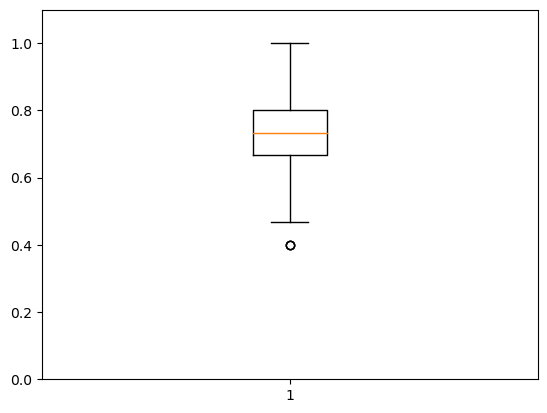

In [418]:
fig, ax = plt.subplots()
acc_data = results["final_accuracy"]#[~np.isnan(results["time_taken"])]
VP = ax.boxplot(acc_data)
ax.set_ylim(0,1.1)
plt.show()

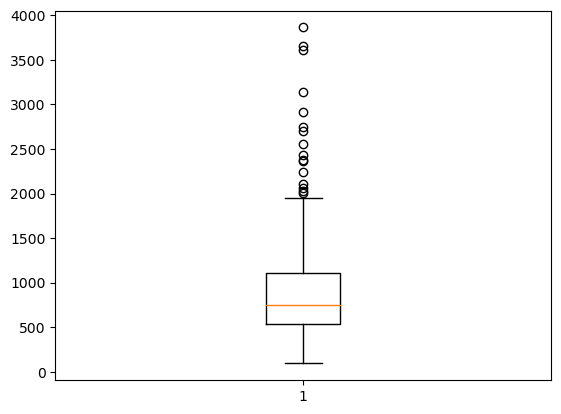

In [419]:
fig, ax = plt.subplots()
time_data = results["time_taken"][~np.isnan(results["time_taken"])]
VP = ax.boxplot(time_data)
plt.show()

In [420]:
np.mean(time_data)

904.0872483221476

I also checked if anything obviously changes if we e.g. remove everybody who took less than ten minutes in total. The result is that this doesn't change anything - there does not seem to be a qualitative difference in the data of the people who took longer or less long.

Next idea: lets look at the time taken for each task, and see if there are any super low outliers there.

In [421]:
task_list = list(participants_tasks['wo_0_0'].keys())

len(task_list)

15

Group 0, user time
mean: 3.1354399391835526
min: 0.4609909693400065
Group 0, final time
mean: 8.008835284211065
min: 1.4918359438578288
Group 0, total time
mean: 11.144275223394615
min: 2.2936717442103793
Group 1
mean: 3.0186921580944186
min: 0.7953094323476155


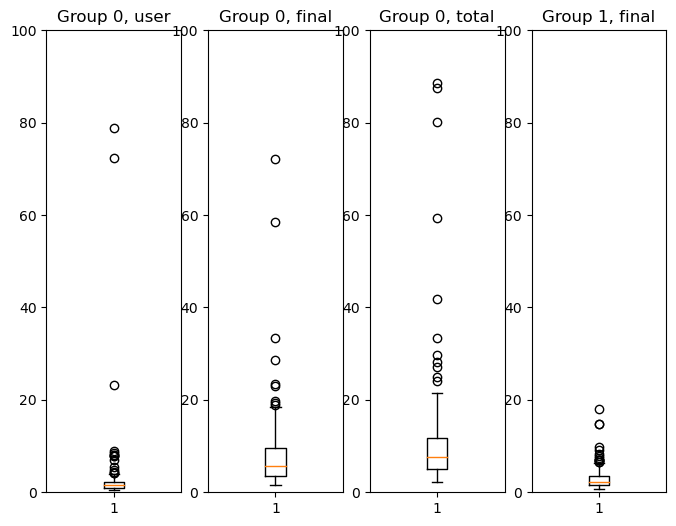

In [484]:
wo_0_user = {}
wo_0_final = {}
wo_1_final = {}
w_0_user = {}
w_0_final = {}
w_1_final = {}

time_per_p_0 = {"user":{}, "final":{}, "total":{}}
time_per_p_1 = {}

for p in participants_tasks:
    
    if p[3] == "0" or p[2] == "0":
        time_per_p_0["user"][p] = []
        time_per_p_0["final"][p] = []
        time_per_p_0["total"][p] = []
    elif p[3] == "1" or p[2] == "1":
        time_per_p_1[p] = []
    else:
        print(p[2], p[3], "error")
    
    for t in participants_tasks[p]:
        if not t in wo_0_user:
            wo_0_user[t] = []
        if not t in wo_0_final:
            wo_0_final[t] = []
        if not t in wo_1_final:
            wo_1_final[t] = []
        if not t in w_0_user:
            w_0_user[t] = []
        if not t in w_0_final:
            w_0_final[t] = []
        if not t in w_1_final:
            w_1_final[t] = []
            
        if p[:2] == "wo":
            if p[3] == "0":
                wo_0_user[t].append(participants_tasks[p][t]["user_time"])
                wo_0_final[t].append(participants_tasks[p][t]["final_time"])
                time_per_p_0["user"][p].append(participants_tasks[p][t]["user_time"])
                time_per_p_0["final"][p].append(participants_tasks[p][t]["final_time"])
                time_per_p_0["total"][p].append(participants_tasks[p][t]["user_time"] + participants_tasks[p][t]["final_time"])
            else:
                wo_1_final[t].append(participants_tasks[p][t]["final_time"])
                time_per_p_1[p].append(participants_tasks[p][t]["final_time"])
        else:
            if p[2] == "0":
                w_0_user[t].append(participants_tasks[p][t]["user_time"])
                w_0_final[t].append(participants_tasks[p][t]["final_time"])
                time_per_p_0["user"][p].append(participants_tasks[p][t]["user_time"])
                time_per_p_0["final"][p].append(participants_tasks[p][t]["final_time"])
                time_per_p_0["total"][p].append(participants_tasks[p][t]["user_time"] + participants_tasks[p][t]["final_time"])
            else:
                w_1_final[t].append(participants_tasks[p][t]["final_time"])
                time_per_p_1[p].append(participants_tasks[p][t]["final_time"])
                
#pprint.pprint(wo_0_user)
                
for t in wo_0_user:
    wo_0_user[t] = np.mean(wo_0_user[t])
    wo_0_final[t] = np.mean(wo_0_final[t])
    wo_1_final[t] = np.mean(wo_1_final[t])
    w_0_user[t] = np.mean(w_0_user[t])
    w_0_final[t] = np.mean(w_0_final[t])
    w_1_final[t] = np.mean(w_1_final[t])

data_wo_means = {"wo_0_user":list(wo_0_user.values()),
                 "wo_0_final":list(wo_0_final.values()),
                 "wo_1_final":list(wo_1_final.values())
                }

data_w_means = {"w_0_user":list(w_0_user.values()),
                 "w_0_final":list(w_0_final.values()),
                 "w_1_final":list(w_1_final.values())
                }

time_per_p_0["user"] = {p:np.mean(time_per_p_0["user"][p]) for p in time_per_p_0["user"]}
time_per_p_0["final"] = {p:np.mean(time_per_p_0["final"][p]) for p in time_per_p_0["final"]}
time_per_p_0["total"] = {p:np.mean(time_per_p_0["total"][p]) for p in time_per_p_0["total"]}
time_per_p_1 = {p:np.mean(time_per_p_1[p]) for p in time_per_p_1}

print("Group 0, user time")
print("mean:", np.mean(list(time_per_p_0["user"].values())))
print("min:", min(list(time_per_p_0["user"].values())))
print("Group 0, final time")
print("mean:", np.mean(list(time_per_p_0["final"].values())))
print("min:", min(list(time_per_p_0["final"].values())))
print("Group 0, total time")
print("mean:", np.mean(list(time_per_p_0["total"].values())))
print("min:", min(list(time_per_p_0["total"].values())))
print("Group 1")
print("mean:", np.mean(list(time_per_p_1.values())))
print("min:", min(list(time_per_p_1.values())))

time_per_user_data = [list(time_per_p_0["user"].values()), list(time_per_p_0["final"].values()), 
                      list(time_per_p_0["total"].values()), list(time_per_p_1.values())]
labels = ["Group 0, user", "Group 0, final", "Group 0, total", "Group 1, final"]

fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize=(8, 6))
for i in range(4):
    VP = axs[i].boxplot(time_per_user_data[i])
    axs[i].title.set_text(labels[i])
    axs[i].set_ylim(0, 100)
plt.show()

In [485]:
results["time_per_task"] = pd.Series(time_per_p_0["total"]|time_per_p_1)
results

,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,AI_knowledge,perceived_accuracy,perceived_domain_knowledge,switch_ratio,switch_not_ratio,total_trust,fai,com,rel,time_per_task
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,"[NO, ]",0.666667,1,0.250000,0.750000,0.250000,-0.2,0.75,0.333333,3.353436
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,"[NO, ]",0.733333,0,0.500000,0.500000,-0.250000,-1.0,0.25,0.333333,4.425740
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,"[YES, Through ChatGPT, as well as discussions...",0.866667,0,0.200000,0.800000,-0.666667,-1.0,-0.50,-0.333333,6.221536
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,"[YES, I am in a master of artificial inteligen...",0.800000,1,0.200000,0.800000,0.000000,-0.4,0.25,0.333333,8.652404
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,"[YES, I come into contact with ai in chat bots]",0.600000,2,0.571429,0.428571,0.583333,0.8,0.50,0.333333,6.889090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,0,0,0,...,"[YES, chatgpt etc.]",0.533333,-1,0.000000,0.000000,-1.500000,-0.8,-2.00,-2.000000,2.174590
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,0,0,0,...,"[NO, ]",0.466667,0,0.000000,0.000000,0.250000,0.2,0.25,0.333333,3.138306
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,0,0,0,...,"[YES, Chat GPT]",0.666667,1,0.000000,0.000000,0.083333,-0.4,0.00,1.000000,2.032701
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,0,0,0,...,"[YES, I have some works where AI is applied in...",0.666667,1,0.000000,0.000000,-0.333333,-0.2,-0.25,-0.666667,3.636001


Again, the results show that there are no bottom outliers who took very much less time per task than everybody else. However, it is quite interesting how much longer people take to consider the task if they are given the option to make up their mind first and only then are shown the AI prediction!

Next, we plot the times per task. Here, there is not much of interest. Note that this would not show a decline over time, as the order was randomized. This would need to be implemented seperately.

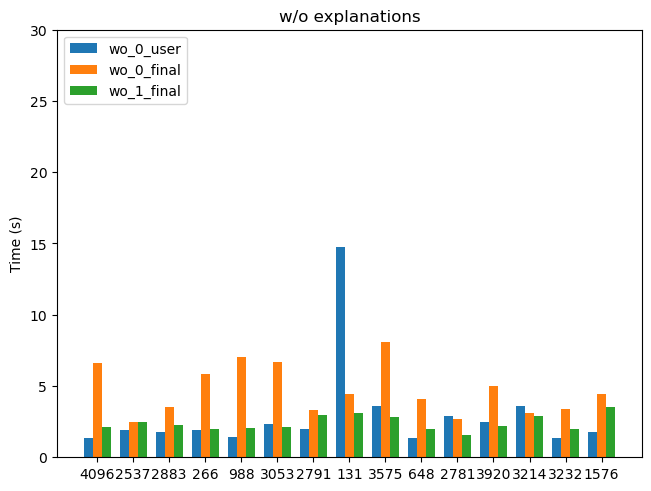

In [424]:
x = np.arange(len(task_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_wo_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('w/o explanations')
ax.set_xticks(x + width, task_list)
ax.legend(loc='upper left') #, ncols=3)
ax.set_ylim(0, 30)

plt.show()

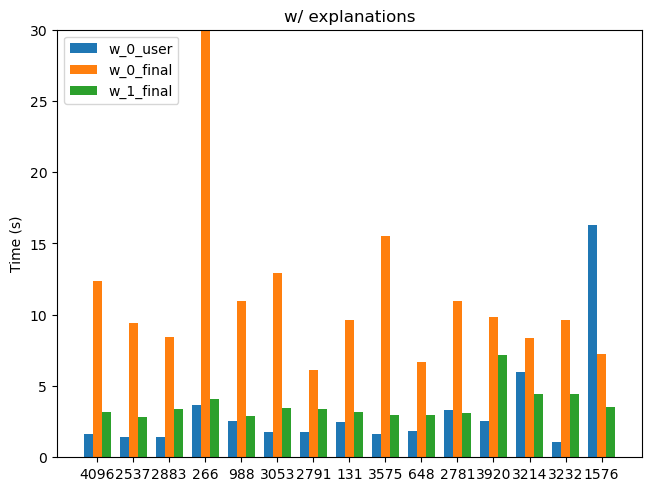

In [425]:
x = np.arange(len(task_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_w_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)')
ax.set_title('w/ explanations')
ax.set_xticks(x + width, task_list)
ax.legend(loc='upper left') #, ncols=3)
ax.set_ylim(0, 30)

plt.show()

## Find Bad Faith/Too Dumb/Too Fast

Additional ideas:

Were there any people who simply always answered the same thing? This would not be found if we remove people with extremely low accuracy, but is otherwise unlikely.

I also considered checking several things (overall accuracy, perceived domain knowledge, language skills, previous approvals of this participant, etc. 
Surprisingly, when rerunning some visualizations with a number of people removed on this basis, there was also no difference in the results. I don't think that simply combining these factors based on gut feeling is a good way to kick out bad faith participants.

In [486]:
grad_ratio = {}

for p in participants_tasks:
    final_decisions = [participants_tasks[p][t]["final_decision"] for t in participants_tasks[p]]
    final_decisions = Counter(final_decisions)
    ratio = final_decisions["GRADUATE"]/15
    if ratio == 1:
        print(p, final_decisions)
    grad_ratio[p] = ratio
    
results["grad_ratio"] = pd.Series(grad_ratio)
results

wo_1_43 Counter({'GRADUATE': 15})
wo_1_66 Counter({'GRADUATE': 15})


,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,perceived_accuracy,perceived_domain_knowledge,switch_ratio,switch_not_ratio,total_trust,fai,com,rel,time_per_task,grad_ratio
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,0.666667,1,0.250000,0.750000,0.250000,-0.2,0.75,0.333333,3.353436,0.600000
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0.733333,0,0.500000,0.500000,-0.250000,-1.0,0.25,0.333333,4.425740,0.666667
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0.866667,0,0.200000,0.800000,-0.666667,-1.0,-0.50,-0.333333,6.221536,0.600000
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,0.800000,1,0.200000,0.800000,0.000000,-0.4,0.25,0.333333,8.652404,0.733333
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,0.600000,2,0.571429,0.428571,0.583333,0.8,0.50,0.333333,6.889090,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,0,0,0,...,0.533333,-1,0.000000,0.000000,-1.500000,-0.8,-2.00,-2.000000,2.174590,0.866667
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,0,0,0,...,0.466667,0,0.000000,0.000000,0.250000,0.2,0.25,0.333333,3.138306,0.733333
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,0,0,0,...,0.666667,1,0.000000,0.000000,0.083333,-0.4,0.00,1.000000,2.032701,0.933333
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,0,0,0,...,0.666667,1,0.000000,0.000000,-0.333333,-0.2,-0.25,-0.666667,3.636001,0.800000


In [487]:
# save extended dataframe

results.to_csv("results.csv")


Okay, lets look at the time per task again for each group, and consider who needs to be kicked based on too little time taken. Lets calculate some percentiles:

In [488]:
# split into separate dataframes for easy access
results_0 = results[results["priming_group"] == 0]
results_1 = results[results["priming_group"] == 1]
results_w = results[results["explanation_group"] == "w"]
results_wo = results[results["explanation_group"] == "wo"]

In [489]:
task_times_0 = list(results_0["time_per_task"])

print("People in Group 0:", len(task_times_0))

for thresh in range(10):
    percent = len([t for t in task_times_0 if t<thresh])
    print(f"Under {thresh} seconds:", percent, "people in Group 0")
    
print("---")
print("People in Group 1:", len(task_times_1))

task_times_1 = list(results_1["time_per_task"])

for thresh in range(1, 10):
    percent = len([t for t in task_times_1 if t<thresh])
    print(f"Under {thresh} seconds:", percent, "people in of Group 1")

People in Group 0: 146
Under 0 seconds: 0 people in Group 0
Under 1 seconds: 0 people in Group 0
Under 2 seconds: 0 people in Group 0
Under 3 seconds: 5 people in Group 0
Under 4 seconds: 23 people in Group 0
Under 5 seconds: 33 people in Group 0
Under 6 seconds: 49 people in Group 0
Under 7 seconds: 61 people in Group 0
Under 8 seconds: 77 people in Group 0
Under 9 seconds: 93 people in Group 0
---
People in Group 1: 152
Under 1 seconds: 10 people in of Group 1
Under 2 seconds: 70 people in of Group 1
Under 3 seconds: 108 people in of Group 1
Under 4 seconds: 120 people in of Group 1
Under 5 seconds: 132 people in of Group 1
Under 6 seconds: 132 people in of Group 1
Under 7 seconds: 143 people in of Group 1
Under 8 seconds: 146 people in of Group 1
Under 9 seconds: 147 people in of Group 1


In [436]:
# Test: combine different exclusion criteria in different ways - no effect

#df_test_0 = pd.DataFrame([results_0["time_per_task"]<7, 
#                        results_0["user_accuracy"]<0.7,
#                        results_0["time_taken"]<450,
#                        results_0["perceived_domain_knowledge"]<1,
#                        results_0["total_approvals"]<10,
#                        results_0["language"]!="English"
#                       ])
#for c in df_test_0:
#    if sum(list(df_test_0[c]))>4:
#        print(c)
#        participants_to_kick.append(c)
#        
#df_test_1 = pd.DataFrame([results_1["time_per_task"]<7, 
#                        results_1["time_taken"]<450,
#                        results_1["perceived_domain_knowledge"]<1,
#                        results_1["total_approvals"]<10,
#                        results_1["language"]!="English"
#                       ])

#for c in df_test_1:
#    if sum(list(df_test_1[c]))>3:
#        print(c)
#        participants_to_kick.append(c)

## Removal

Finally, lets remove those people who either 

- always answered grad

or 

- took less then 3s in group 0 or less than 1s in group 1

In [490]:
results_filtered = results[results["grad_ratio"] != 1]
results_filtered = results_filtered[~((results_filtered["priming_group"] == 0) & (results_filtered["time_per_task"]<3))]
results_filtered = results_filtered[~((results_filtered["priming_group"] == 1) & (results_filtered["time_per_task"]<1))]
results_filtered.shape

(281, 28)

In [491]:
# redo the split
# split into separate dataframes for easy access

# could do with filtered results here
# however, weirdly enough, there is still not any noticeable difference in the results below
# I think it really doesn't matter

results_0 = results[results["priming_group"] == 0]
results_1 = results[results["priming_group"] == 1]
results_w = results[results["explanation_group"] == "w"]
results_wo = results[results["explanation_group"] == "wo"]

results_w_0 = results_0[results_0["explanation_group"] == "w"]
results_w_1 = results_1[results["explanation_group"] == "w"]
results_wo_0 = results_0[results_0["explanation_group"] == "wo"]
results_wo_1 = results_1[results["explanation_group"] == "wo"]

print(results_w_0.shape)
print(results_w_1.shape)
print(results_wo_0.shape)
print(results_wo_1.shape)

# save extended dataframe

results.to_csv("results.csv")

(74, 28)
(74, 28)
(72, 28)
(78, 28)


/var/folders/ky/d01ywblx1l5fk6g19868_t7m0000gn/T/ipykernel_48144/1326010054.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_w_1 = results_1[results["explanation_group"] == "w"]
/var/folders/ky/d01ywblx1l5fk6g19868_t7m0000gn/T/ipykernel_48144/1326010054.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_wo_1 = results_1[results["explanation_group"] == "wo"]


In [438]:
results.columns

Index(['file', 'explanation_group', 'priming_group', 'participant_number',
       'final_accuracy', 'ai_agreement', 'n_na', 'n_wt', 'n_wmt', 'n_ut',
       'n_ot', 'Prolific ID', 'time_taken', 'language', 'total_approvals',
       'priming', 'user_accuracy', 'AI_knowledge', 'perceived_accuracy',
       'perceived_domain_knowledge', 'switch_ratio', 'switch_not_ratio',
       'total_trust', 'fai', 'com', 'rel', 'time_per_task', 'grad_ratio'],
      dtype='object')

# Visualization

## Comparisons between groups

First, lets make some graphics where we can see all four group, or compare either explanation or bias across the whole sample population.

In [495]:
def compare_priming_groups(column, violin = False):
    
    print(column.upper())
    print("- priming - ")
    
    print(stats.ttest_ind(results_0[column], results_1[column]))

    fig, ax = plt.subplots()
    if violin:
        VP = ax.violinplot([results_0[column], results_1[column]])#, labels = ["no priming", "priming"])
    else:
        VP = ax.boxplot([results_0[column], results_1[column]])#, labels = ["no priming", "priming"])
    ax.set_xticks([1, 2], labels=["w/o priming", "w/ priming"])
    ax.set_title(column)
    plt.show()
    
def compare_explanation_groups(column, violin = False):
    
    print(column.upper())
    print("- explanation - ")
    
    print(stats.ttest_ind(results_w[column], results_wo[column]))

    fig, ax = plt.subplots()
    if violin:
        VP = ax.violinplot([results_wo[column], results_w[column]])#, labels = ["w/ explanation", "w/o explanation"])
    else:
        VP = ax.boxplot([results_wo[column], results_w[column]])#, labels = ["w/ explanation", "w/o explanation"])
    ax.set_xticks([1, 2], labels=["w/o explanation", "w/ explanation"])
    ax.set_title(column)
    plt.show()
    
def compare_all_groups(column, violin = False):
    
    print(column.upper())
    
    print("Difference based on priming/no priming:")
    print(stats.ttest_ind(results_0[column], results_1[column]))
    print("- for without explanation group:")
    print(stats.ttest_ind(results_wo_0[column], results_wo_1[column]))
    print("- for with explanation group")
    print(stats.ttest_ind(results_w_0[column], results_w_1[column]))
    print()
    print("Difference based on explanation/no explanation:")
    print(stats.ttest_ind(results_w[column], results_wo[column]))
    print("- for without priming group:")
    print(stats.ttest_ind(results_wo_0[column], results_w_0[column]))
    print("- for with priming group")
    print(stats.ttest_ind(results_wo_1[column], results_w_1[column]))
    print()
    
    
    #print(stats.ttest_ind(results_w[column], results_wo[column]))

    fig, ax = plt.subplots()
    if violin:
        VP = ax.violinplot([results_wo_0[column], results_wo_1[column], results_w_0[column], results_w_1[column]])
    else:
        VP = ax.boxplot([results_wo_0[column], results_wo_1[column], results_w_0[column], results_w_1[column]])
    ax.set_xticks([1, 2, 3, 4], 
                  labels=["w/o priming \n w/o explanation", 
                          "w/ priming \n w/o explanation", 
                          "w/o priming \n w/ explanation", 
                          "w/ priming \n w/ explanation"])
    ax.set_title(column)
    plt.show()
        
   

FINAL_ACCURACY
Difference based on priming/no priming:
Ttest_indResult(statistic=-1.4037406541889186, pvalue=0.16144434182201386)
- for without explanation group:
Ttest_indResult(statistic=-1.9553442567456851, pvalue=0.052426200021923275)
- for with explanation group
Ttest_indResult(statistic=0.10385208339950427, pvalue=0.917429255164117)

Difference based on explanation/no explanation:
Ttest_indResult(statistic=0.09930057261623092, pvalue=0.9209668401288491)
- for without priming group:
Ttest_indResult(statistic=-1.1312303535810795, pvalue=0.25983858633305956)
- for with priming group
Ttest_indResult(statistic=1.03325714358188, pvalue=0.30314659498660984)



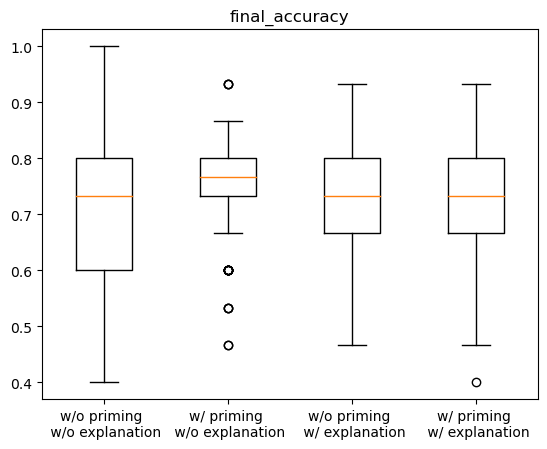

In [493]:
compare_all_groups("final_accuracy", violin = False)

TOTAL_TRUST
Difference based on priming/no priming:
Ttest_indResult(statistic=1.3564553159955148, pvalue=0.17598803781700212)
- for without explanation group:
Ttest_indResult(statistic=-0.5121742881738042, pvalue=0.6092924888935387)
- for with explanation group
Ttest_indResult(statistic=2.1473331757795844, pvalue=0.03341784800462773)

Difference based on explanation/no explanation:
Ttest_indResult(statistic=-0.08069996691032538, pvalue=0.9357350989347074)
- for without priming group:
Ttest_indResult(statistic=-1.4393339944618317, pvalue=0.15222615684687588)
- for with priming group
Ttest_indResult(statistic=1.41100770492706, pvalue=0.1603130050465858)



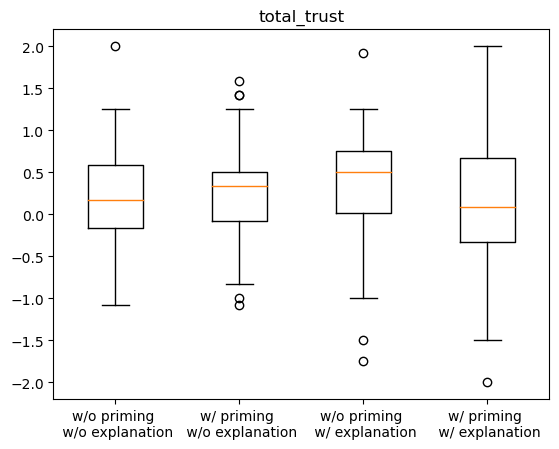

In [496]:
compare_all_groups("total_trust", violin = False)

AI_AGREEMENT
Difference based on priming/no priming:
Ttest_indResult(statistic=1.888099187901052, pvalue=0.059990498800962896)
- for without explanation group:
Ttest_indResult(statistic=0.9216690176730125, pvalue=0.3582012329969604)
- for with explanation group
Ttest_indResult(statistic=1.7241033399192687, pvalue=0.08680579489702236)

Difference based on explanation/no explanation:
Ttest_indResult(statistic=1.0789406066158955, pvalue=0.28149261710802526)
- for without priming group:
Ttest_indResult(statistic=-1.209784707368115, pvalue=0.22834380627194154)
- for with priming group
Ttest_indResult(statistic=-0.3347633991365567, pvalue=0.7382712259539868)



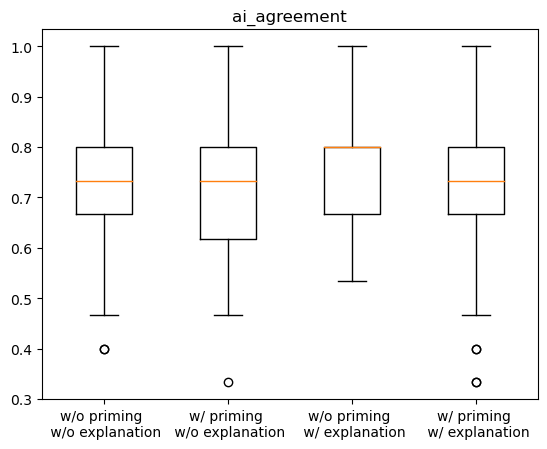

In [497]:
compare_all_groups("ai_agreement")

## Correlations

In [536]:
def scatter(column_x, column_y, dfs, labels, title = None, likert_x = False, likert_y = False):

    fig, ax = plt.subplots()
    
    for i, df in enumerate(dfs):
        SC = ax.scatter(df[column_x], df[column_y], label = labels[i])
        print(labels[i])
        pearsons, p = stats.pearsonr(df[column_x], df[column_y])
        print(pearsons, "p =", p)
        #if p < 0.05:
        #    m, b = np.polyfit(df[column_x], df[column_y], 1)
        #    trend = ax.plot(x, m*x+b)
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)
    if likert_x:
        ax.set_xlim(-2.5, 2.5)
    else:
        ax.set_xlim(-0.1, 1.1)
    if likert_y:
        ax.set_ylim(-2.5, 2.5)
    else:
        ax.set_ylim(-0.1, 1.1)
    if not title is None:
        ax.set_title(title)
    ax.legend(loc='lower right') #, ncols=3)
    plt.show()
    
def scatter_subplots(column_x, column_y, dfs, labels, ncols, nrows, 
                     likert_x = False, likert_y = False):
    
    fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (8, 4*nrows))
    if nrows == 1:
        axs = np.array([axs])
    
    for row in range(nrows):
        for col in range(ncols):
            df = dfs[row][col]
            pearsons, p = stats.pearsonr(df[column_x], df[column_y])
            print(labels[row][col], pearsons, p)
            if p < 0.05:
                color = "green"
            else:
                color = "grey"
            axs[row, col].scatter(df[column_x], df[column_y], c = color)
            axs[row, col].set_title(labels[row][col])
            if row == nrows - 1:
                axs[row, col].set_xlabel(column_x)
            if col == 0:
                axs[row, col].set_ylabel(column_y)
            if likert_x:
                axs[row, col].set_xlim(-2.5, 2.5)
            if likert_y:
                axs[row, col].set_ylim(-2.5, 2.5)
    

w/o priming, w/o explanation 0.17058302511704673 0.15196175485572944
w/o priming, w/ explanation 0.30656418638364796 0.00789420813206545


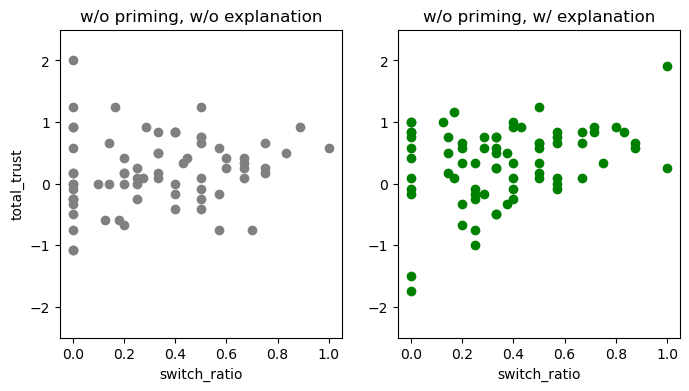

In [538]:
scatter_subplots("switch_ratio", "total_trust", [[results_wo_0, results_w_0]], 
        [["w/o priming, w/o explanation", "w/o priming, w/ explanation"]], 2, 1, likert_y = True)

w/o priming, w/o explanation 0.26004272977279475 0.02738257376289528
w/o priming, w/ explanation 0.17776480220635596 0.12970832265063967
w/ priming, w/o explanation 0.048601205283689865 0.6726206552955749
w/ priming, w/ explanation 0.3971436254299766 0.0004592523133215375


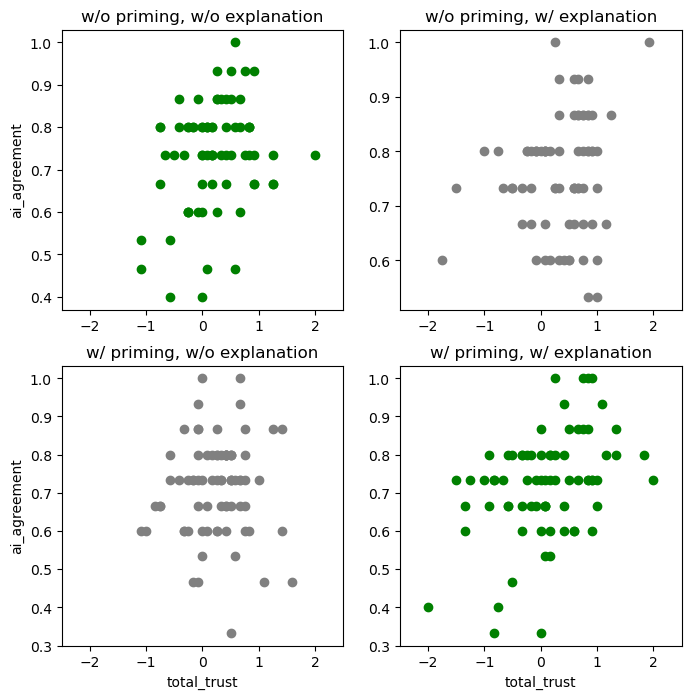

In [539]:
scatter_subplots("total_trust", "ai_agreement", [[results_wo_0, results_w_0],[results_wo_1, results_w_1]], 
        [["w/o priming, w/o explanation", "w/o priming, w/ explanation"],
         ["w/ priming, w/o explanation", "w/ priming, w/ explanation"]],
        ncols = 2, nrows = 2, likert_x = True)

w/o explanation 0.6801959922524327 4.977256841235977e-11
w/ explanation 0.7176392277148717 6.266153822694177e-13


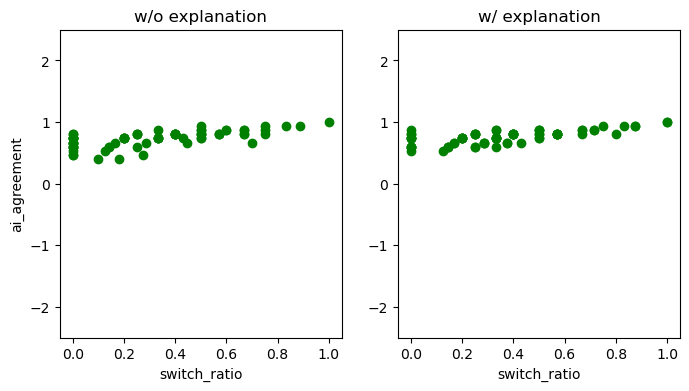

In [541]:
scatter_subplots("switch_ratio", "ai_agreement", [[results_wo_0, results_w_0]], 
        [["w/o explanation", "w/ explanation"]], nrows = 1, ncols = 2, likert_y = True)

**Summary**:

There is a correlation between total trust (reported) and switch ratio only when participants got an explanation! (Note that we don't know the switch ratio for participants in the with priming group.)

The case is similarly weird for the correlation between total trust and ai agreement:
There is a correlation for participants who did get primed AND got an explanation, as well as for those who did not get primed and did not get an explanation.

## Trust Comparisons (Group 0)

For the group without priming, we can also compare in more detail how the presence of explanation influences overtrust, undertrust, etc.

In [402]:
def compare_0(column):
    
    print(column.upper())
    
    print(stats.ttest_ind(results_w_0[column], results_wo_0[column]))

    fig, ax = plt.subplots()
    VP = ax.boxplot([results_w_0[column], results_wo_0[column]], labels = ["w/ explanation", "w/o explanation"])
    ax.set_title(column)
    plt.show()

N_WT
Ttest_indResult(statistic=-0.6666370059458551, pvalue=0.5061170368885223)


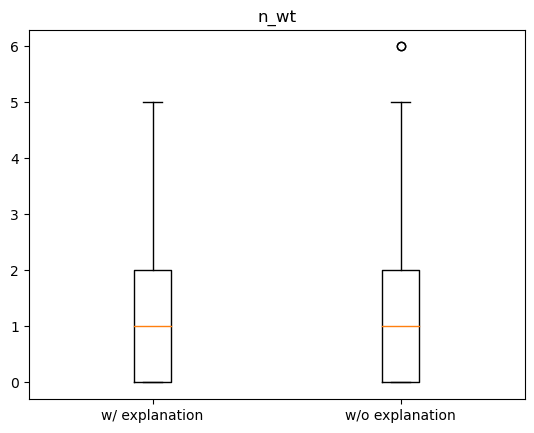

N_UT
Ttest_indResult(statistic=-1.343854275495484, pvalue=0.18120083106386856)


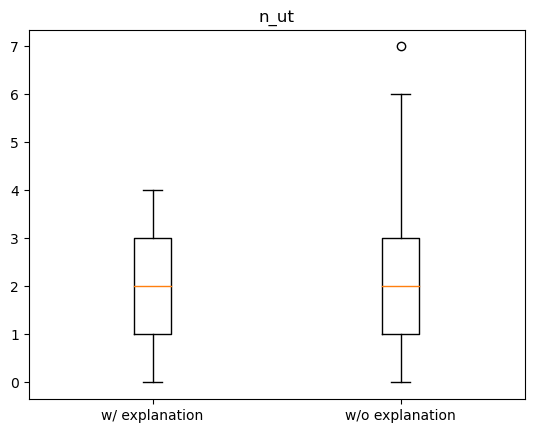

N_OT
Ttest_indResult(statistic=1.362277791848589, pvalue=0.1753295535042507)


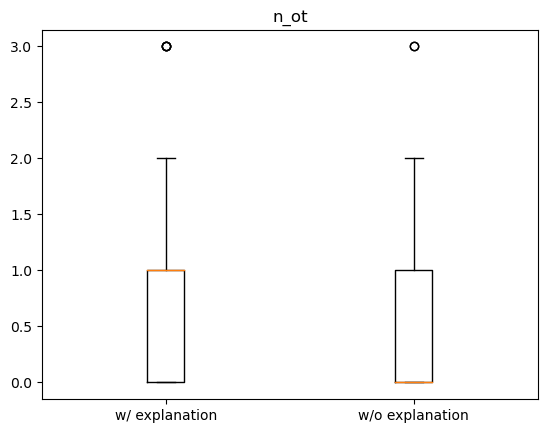

N_WMT
Ttest_indResult(statistic=-0.16371889433335807, pvalue=0.8701919740729944)


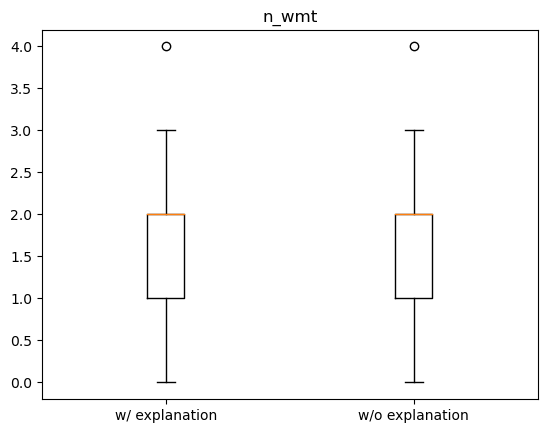

SWITCH_RATIO
Ttest_indResult(statistic=0.7656978943195453, pvalue=0.4451637205352933)


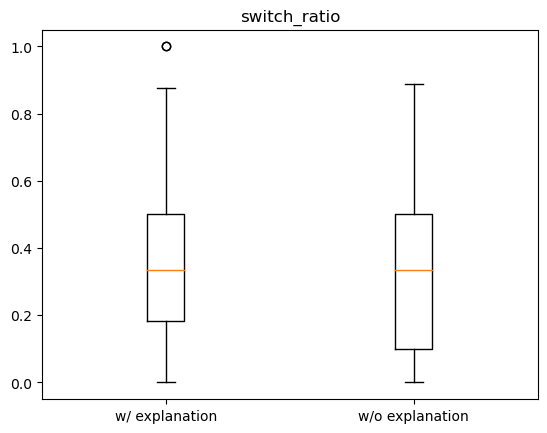

In [403]:
compare_0("n_wt")
compare_0("n_ut")
compare_0("n_ot")
compare_0("n_wmt")
compare_0("switch_ratio")

### Manual Graphics

It seems that whether or not there is a trust paradox might depend on the specific combination of conditions. Lets look at this more closely:

Is there a correlation between total reported trust (HCT) and agreement with the AI suggestions?

- for group w/o XAI, w/o priming :
Pearson's r: 0.23103492887615307 p = 0.056134784087824456

- for group w/o XAI, w/ priming :
Pearson's r: 0.04049394200370768 p = 0.7392604066535468

- for group w/ XAI, w/o priming :
Pearson's r: 0.17660802637744571 p = 0.1406648491777157

- for group w/ XAI, w/ priming :
Pearson's r: 0.3927769493715247 p = 0.000587739478754621



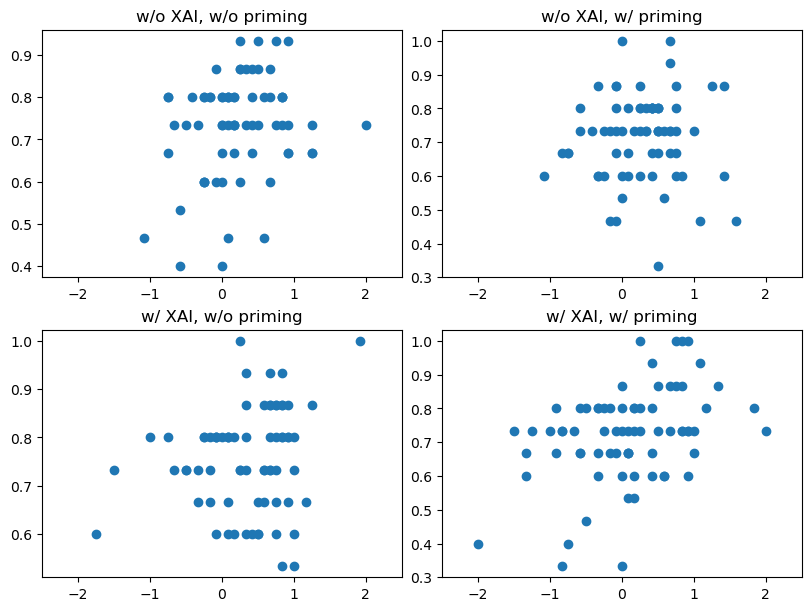

In [404]:
dfs = [[results_wo_0, results_wo_1], [results_w_0, results_w_1]]
labels = [["w/o XAI, w/o priming", "w/o XAI, w/ priming"],["w/ XAI, w/o priming", "w/ XAI, w/ priming"]]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), layout="constrained")

print("Is there a correlation between total reported trust (HCT) and agreement with the AI suggestions?")
print()

for row in range(2):
    for column in range(2):
        
        pearsons, p = stats.pearsonr(dfs[row][column]["total_trust"], dfs[row][column]["ai_agreement"])
        print("- for group", labels[row][column], ":")
        print("Pearson's r:", pearsons, "p =", p)
        print()
    
        SC = axs[row, column].scatter(dfs[row][column]["total_trust"], dfs[row][column]["ai_agreement"])
        axs[row, column].title.set_text(labels[row][column])
        axs[row, column].set_xlim(-2.5, 2.5)
        
plt.show()


Is there a correlation between total reported trust (HCT) and switch ratio?

- for group w/o XAI, w/o priming :
Pearson's r: 0.16964063108386834 p = 0.15133945663354362

- for group w/ XAI, w/o priming :
Pearson's r: 0.30656418638364796 p = 0.007894208132065457



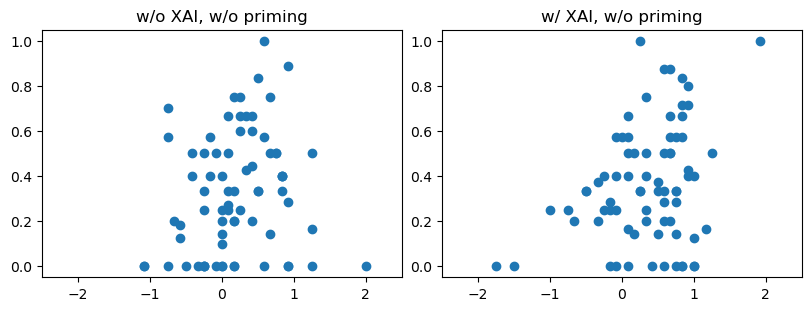

In [33]:
dfs = [[results_wo_0, results_w_0]]
labels = [["w/o XAI, w/o priming", "w/ XAI, w/o priming"]]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 3), layout="constrained")

print("Is there a correlation between total reported trust (HCT) and switch ratio?")
print()

for row in range(1):
    for column in range(2):
        
        pearsons, p = stats.pearsonr(dfs[row][column]["total_trust"], dfs[row][column]["switch_ratio"])
        print("- for group", labels[row][column], ":")
        print("Pearson's r:", pearsons, "p =", p)
        print()
    
        SC = axs[column].scatter(dfs[row][column]["total_trust"], dfs[row][column]["switch_ratio"])
        axs[column].title.set_text(labels[row][column])
        axs[column].set_xlim(-2.5, 2.5)
        
plt.show()

In [39]:
AI_exp_wo = {
    '0_3.csv': ["ChatGPT","Social Media"],
    '0_4.csv': ["Uni"],
    '0_5.csv': ["ChatBots"],
    '0_6.csv': ["ChatGPT"],
    '0_7.csv': ["Work", "Generative AI"],
    '0_8.csv': ["ChatGPT"],
    '0_9.csv': ["ChatGPT", "Photoshop AI"],
    '0_11.csv': ["ChatBots"],
    '0_13.csv': ["Whatsapp"],
    '0_14.csv': ["ChatGPT","Image Generators"],
    '0_15.csv': ["Uni"],
    '0_17.csv': ["Internet"],
    '0_18.csv': ["ChatGPT"],
    '0_19.csv': ["ChatGPT"],
    '0_22.csv': ["ChatGPT","Literature"],
    '0_24.csv': ["OpenAI", "Work","Personal"],
    '0_25.csv': ["Online Course"],
    '0_26.csv': ["Phone","Content Generation"],
    '0_27.csv': ["Work"],
    '0_33.csv': ["Uni"],
    '0_38.csv': ["ChatGPT"],
    '0_39.csv': ["ChatGPT","Everyday Life"],
    '0_40.csv': ["ChatGPT","PlaygroundAI"],
    '0_41.csv': ["Research"],
    '0_42.csv': ["ChatGPT"],
    '0_45.csv': ["BardAI","Stable Diffusion"],
    '0_46.csv': ["Work"],
    '0_49.csv': ["ChatGPT","Work"],
    '0_50.csv': ["Uni","Research"],
    '0_53.csv': ["ChatGPT"],
    '0_55.csv': ["ChatGPT","Internet"],
    '0_56.csv': ["Uni"],
    '0_57.csv': ["Daily"],
    '0_59.csv': ["ChatGPT"],
    '0_60.csv': ["Research Tool"],
    '0_64.csv': ["Media","Work"],
    '0_65.csv': ["ChatBots","Service Robot"],
    '0_66.csv': ["Internet"],
    '0_67.csv': ["ChatGPT","Midjourney"],
    '0_68.csv': ["Social Media","ChatGPT"],
    '0_69.csv': ["ChatGPT","Work"],
    '0_70.csv': ["Internet","Participation in other studies"],
    '0_71.csv': ["Bank App"],
    '0_72.csv': ["Internet"],
    '0_73.csv': ["ChatGPT","Image Generator"],
    '0_74.csv': ["Discussion among friends"],
    '0_75.csv': ["Research"],
    '0_76.csv': ["ChatGPT","Work"],
    '0_81.csv': ["ChatGPT","Content Generation"],
}

# Categories
# Context encountered (Uni, Work, Personal, Own Research) -> Maybe this should be Purpose? For work its a purpose but for uni its more context... hmmm
# Specific Tools (ChatGpt, Midjourney)
# General Categories of Tools (Chatbots, Image Generators)
# Frequency of Use
# Purpose for Use (Content Generation, Writing Emails)

# Weird:
#0_13 -> WHatsapp?
#0_17 -> Internet
#0_26 -> in my phone for writing content
#0_50 -> does "both supervised and unsupervised learning" mean supervised by a teacher and on their own? or is this about some machine learning topics the person did research about?
# 0_71 -> Bank app
# 0_81 -> "content creation platforms and educational platforms such as chat gpt" chat gpt as educational platform?

# Useless -> Grounds for general exclusion because they did not answer the questions in a way that makes sense?
# 0_30,0_61 -> Yes + No
# 0_35,0_47 -> Yes + no elaboration
# 0_51 -> Statement about perceived bias of the AI in the study?


In [38]:
print(results["AI_knowledge"].to_string())

wo_0_0                                                [NO, ]
wo_0_1                                                [NO, ]
wo_0_3     [YES, Through ChatGPT,  as well as discussions...
wo_0_4     [YES, I am in a master of artificial inteligen...
wo_0_5       [YES, I come into contact with ai in chat bots]
wo_0_6                 [YES, through daily usage of chatgpt]
wo_0_7     [YES, I rely on some artificial intelligences ...
wo_0_8                           [YES, I have used chat GPT]
wo_0_9          [YES, I have used chat gpt and photoshop ai]
wo_0_10                                               [NO, ]
wo_0_11                               [YES, chatting mostly]
wo_0_12                                               [NO, ]
wo_0_13             [YES, Well,  theres one on my whatsapp.]
wo_0_14    [YES, ChatGPT,  more than one Ai images genera...
wo_0_15    [YES, I'm studying Data Science and I took a c...
wo_0_16                                               [NO, ]
wo_0_17                 